In [1]:
!pip3 install mlxtend --user
%pip install mlxtend --upgrade

     |████████████████████████████████| 1.3 MB 16.5 MB/s 
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


In [2]:
import pandas as pd
import collections, numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
encounters = '/content/drive/MyDrive/Deep Learning/Frequent Pattern Mining/encounters.csv'
patients = '/content/drive/MyDrive/Deep Learning/Frequent Pattern Mining/patients.csv'
providers = '/content/drive/MyDrive/Deep Learning/Frequent Pattern Mining/providers.csv'

In [5]:
enco = pd.read_csv(encounters)
enco.head()

,Id,START,STOP,PATIENT,ORGANIZATION,PROVIDER,PAYER,ENCOUNTERCLASS,CODE,DESCRIPTION,BASE_ENCOUNTER_COST,TOTAL_CLAIM_COST,PAYER_COVERAGE,REASONCODE,REASONDESCRIPTION
0,395d5768-631e-5b21-a64a-5fe6245841c7,1998-11-08T10:45:39Z,1998-11-08T11:00:39Z,9b5de0da-9c38-3584-acd7-98f03f3177d4,6a3fe229-6415-3288-ad7d-1214f3d56181,d510ac9f-a5aa-3637-ac69-ede8d5cfe114,5059a55e-5d6e-34d1-b6cb-d83d16e57bcf,wellness,162673000,General examination of patient (procedure),129.16,1481.66,0.0,NaN,NaN
1,e21e331b-58b7-b1fe-3931-02a708d67d36,2010-09-22T09:34:36Z,2010-09-22T09:49:36Z,231a2cb1-0ebe-dc12-3c96-f625d795ef3a,67eb14d3-4c84-3782-9ab2-177f51acfa9f,fad0788a-e7e9-373e-8da4-9e5fda549062,047f6ec3-6215-35eb-9608-f9dda363a44c,wellness,162673000,General examination of patient (procedure),129.16,1429.29,0.0,NaN,NaN
2,86a2b4fa-8341-837a-762a-eee2f4e1b987,2011-04-11T23:33:31Z,2011-04-12T01:18:39Z,34c9600a-6f70-b552-96bc-f751024f8746,e44f438a-601b-30fb-85eb-bfaf8ddcb5ad,07f8c23e-c662-3c5a-a6b7-d97af58cc7f1,047f6ec3-6215-35eb-9608-f9dda363a44c,emergency,50849002,Emergency Room Admission,129.16,9092.99,0.0,128613002.0,Seizure disorder
3,73a11da3-df04-f61a-0834-5d597a473f10,2011-09-28T09:34:36Z,2011-09-28T09:49:36Z,231a2cb1-0ebe-dc12-3c96-f625d795ef3a,67eb14d3-4c84-3782-9ab2-177f51acfa9f,fad0788a-e7e9-373e-8da4-9e5fda549062,047f6ec3-6215-35eb-9608-f9dda363a44c,wellness,162673000,General examination of patient (procedure),129.16,786.33,0.0,NaN,NaN
4,3cfa72dd-23fb-05a0-c242-f6c0b775f97a,1999-11-14T10:45:39Z,1999-11-14T11:00:39Z,9b5de0da-9c38-3584-acd7-98f03f3177d4,6a3fe229-6415-3288-ad7d-1214f3d56181,d510ac9f-a5aa-3637-ac69-ede8d5cfe114,5059a55e-5d6e-34d1-b6cb-d83d16e57bcf,wellness,162673000,General examination of patient (procedure),129.16,786.33,0.0,NaN,NaN


In [6]:
pat = pd.read_csv(patients)
pat.columns

Index(['Id', 'BIRTHDATE', 'DEATHDATE', 'SSN', 'DRIVERS', 'PASSPORT', 'PREFIX',
       'FIRST', 'LAST', 'SUFFIX', 'MAIDEN', 'MARITAL', 'RACE', 'ETHNICITY',
       'GENDER', 'BIRTHPLACE', 'ADDRESS', 'CITY', 'STATE', 'COUNTY', 'ZIP',
       'LAT', 'LON', 'HEALTHCARE_EXPENSES', 'HEALTHCARE_COVERAGE'],
      dtype='object')

In [7]:
prov = pd.read_csv(providers)
prov.columns

Index(['Id', 'ORGANIZATION', 'NAME', 'GENDER', 'SPECIALITY', 'ADDRESS', 'CITY',
       'STATE', 'ZIP', 'LAT', 'LON', 'UTILIZATION'],
      dtype='object')

**Merging Datasets**

---



Merging "patients" dataset to "encounters" dataset on the basis of primary and forign keys

In [8]:
enco_pat = pd.merge(enco, pat, left_on="PATIENT", right_on="Id")
enco_pat.columns

Index(['Id_x', 'START', 'STOP', 'PATIENT', 'ORGANIZATION', 'PROVIDER', 'PAYER',
       'ENCOUNTERCLASS', 'CODE', 'DESCRIPTION', 'BASE_ENCOUNTER_COST',
       'TOTAL_CLAIM_COST', 'PAYER_COVERAGE', 'REASONCODE', 'REASONDESCRIPTION',
       'Id_y', 'BIRTHDATE', 'DEATHDATE', 'SSN', 'DRIVERS', 'PASSPORT',
       'PREFIX', 'FIRST', 'LAST', 'SUFFIX', 'MAIDEN', 'MARITAL', 'RACE',
       'ETHNICITY', 'GENDER', 'BIRTHPLACE', 'ADDRESS', 'CITY', 'STATE',
       'COUNTY', 'ZIP', 'LAT', 'LON', 'HEALTHCARE_EXPENSES',
       'HEALTHCARE_COVERAGE'],
      dtype='object')

Merging "providers" dataset with "enco_pat" dataset on the basis of primary and forign keys

In [9]:
enco_pat_prov = pd.merge(enco_pat,prov, left_on="PROVIDER", right_on="Id")
enco_pat_prov.head(10)

,Id_x,START,STOP,PATIENT,ORGANIZATION_x,PROVIDER,PAYER,ENCOUNTERCLASS,CODE,DESCRIPTION,BASE_ENCOUNTER_COST,TOTAL_CLAIM_COST,PAYER_COVERAGE,REASONCODE,REASONDESCRIPTION,Id_y,BIRTHDATE,DEATHDATE,SSN,DRIVERS,PASSPORT,PREFIX,FIRST,LAST,SUFFIX,MAIDEN,MARITAL,RACE,ETHNICITY,GENDER_x,BIRTHPLACE,ADDRESS_x,CITY_x,STATE_x,COUNTY,ZIP_x,LAT_x,LON_x,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE,Id,ORGANIZATION_y,NAME,GENDER_y,SPECIALITY,ADDRESS_y,CITY_y,STATE_y,ZIP_y,LAT_y,LON_y,UTILIZATION
0,395d5768-631e-5b21-a64a-5fe6245841c7,1998-11-08T10:45:39Z,1998-11-08T11:00:39Z,9b5de0da-9c38-3584-acd7-98f03f3177d4,6a3fe229-6415-3288-ad7d-1214f3d56181,d510ac9f-a5aa-3637-ac69-ede8d5cfe114,5059a55e-5d6e-34d1-b6cb-d83d16e57bcf,wellness,162673000,General examination of patient (procedure),129.16,1481.66,0.0,NaN,NaN,9b5de0da-9c38-3584-acd7-98f03f3177d4,1980-09-14,NaN,999-94-8451,S99920404,X8777516X,Mrs.,Gwyneth692,Koch169,NaN,Carter549,M,white,nonhispanic,F,Abington Massachusetts US,1037 Bins Quay,Falmouth,Massachusetts,Barnstable County,2540.0,41.603362,-70.628755,1.508463e+06,148114.7235,d510ac9f-a5aa-3637-ac69-ede8d5cfe114,6a3fe229-6415-3288-ad7d-1214f3d56181,Jimmie93 Beahan375,M,GENERAL PRACTICE,26 EDGERTON DR A,N FALMOUTH,MA,02556-2820,41.601508,-70.639317,35
1,3cfa72dd-23fb-05a0-c242-f6c0b775f97a,1999-11-14T10:45:39Z,1999-11-14T11:00:39Z,9b5de0da-9c38-3584-acd7-98f03f3177d4,6a3fe229-6415-3288-ad7d-1214f3d56181,d510ac9f-a5aa-3637-ac69-ede8d5cfe114,5059a55e-5d6e-34d1-b6cb-d83d16e57bcf,wellness,162673000,General examination of patient (procedure),129.16,786.33,0.0,NaN,NaN,9b5de0da-9c38-3584-acd7-98f03f3177d4,1980-09-14,NaN,999-94-8451,S99920404,X8777516X,Mrs.,Gwyneth692,Koch169,NaN,Carter549,M,white,nonhispanic,F,Abington Massachusetts US,1037 Bins Quay,Falmouth,Massachusetts,Barnstable County,2540.0,41.603362,-70.628755,1.508463e+06,148114.7235,d510ac9f-a5aa-3637-ac69-ede8d5cfe114,6a3fe229-6415-3288-ad7d-1214f3d56181,Jimmie93 Beahan375,M,GENERAL PRACTICE,26 EDGERTON DR A,N FALMOUTH,MA,02556-2820,41.601508,-70.639317,35
2,825bffaf-a087-a572-c714-8d7f17454d8c,2002-11-17T10:45:39Z,2002-11-17T11:00:39Z,9b5de0da-9c38-3584-acd7-98f03f3177d4,6a3fe229-6415-3288-ad7d-1214f3d56181,d510ac9f-a5aa-3637-ac69-ede8d5cfe114,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,wellness,162673000,General examination of patient (procedure),129.16,1611.97,0.0,NaN,NaN,9b5de0da-9c38-3584-acd7-98f03f3177d4,1980-09-14,NaN,999-94-8451,S99920404,X8777516X,Mrs.,Gwyneth692,Koch169,NaN,Carter549,M,white,nonhispanic,F,Abington Massachusetts US,1037 Bins Quay,Falmouth,Massachusetts,Barnstable County,2540.0,41.603362,-70.628755,1.508463e+06,148114.7235,d510ac9f-a5aa-3637-ac69-ede8d5cfe114,6a3fe229-6415-3288-ad7d-1214f3d56181,Jimmie93 Beahan375,M,GENERAL PRACTICE,26 EDGERTON DR A,N FALMOUTH,MA,02556-2820,41.601508,-70.639317,35
3,25a40211-3450-c600-0530-c6c3d6fb2fbe,2005-11-20T10:45:39Z,2005-11-20T11:00:39Z,9b5de0da-9c38-3584-acd7-98f03f3177d4,6a3fe229-6415-3288-ad7d-1214f3d56181,d510ac9f-a5aa-3637-ac69-ede8d5cfe114,42c4fca7-f8a9-3cd1-982a-dd9751bf3e2a,wellness,162673000,General examination of patient (procedure),129.16,1335.14,0.0,NaN,NaN,9b5de0da-9c38-3584-acd7-98f03f3177d4,1980-09-14,NaN,999-94-8451,S99920404,X8777516X,Mrs.,Gwyneth692,Koch169,NaN,Carter549,M,white,nonhispanic,F,Abington Massachusetts US,1037 Bins Quay,Falmouth,Massachusetts,Barnstable County,2540.0,41.603362,-70.628755,1.508463e+06,148114.7235,d510ac9f-a5aa-3637-ac69-ede8d5cfe114,6a3fe229-6415-3288-ad7d-1214f3d56181,Jimmie93 Beahan375,M,GENERAL PRACTICE,26 EDGERTON DR A,N FALMOUTH,MA,02556-2820,41.601508,-70.639317,35
4,1340a154-0259-db07-8ddd-df17cae992a0,2008-11-23T10:45:39Z,2008-11-23T11:00:39Z,9b5de0da-9c38-3584-acd7-98f03f3177d4,6a3fe229-6415-3288-ad7d-1214f3d56181,d510ac9f-a5aa-3637-ac69-ede8d5cfe114,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,wellness,162673000,General examination of patient (procedure),129.16,786.33,0.0,NaN,NaN,9b5de0da-9c38-3584-acd7-98f03f3177d4,1980-09-14,NaN,999-94-8451,S99920404,X8777516X,Mrs.,Gwyneth692,Koch169

**Exploring merged dataset if it is merged dataset is OK**

---



In [10]:
#to know how much null values are there in 'PATIENT' column
print(enco_pat_prov['PATIENT'].isna().sum() )

#to know how much null values are there in 'Id_y' column which is merged from "pat" dataset
#print(enco_pat_prov['Id_y'].isna().sum())

enco['PATIENT'].count().sum()

#to know how much unique patient ids are in "ecnocounter" dataset
len(enco['PATIENT'].unique())

#to know how much unique patient ids are in "patients" dataset
len(pat['Id'].unique())

#to check unique ids after merging
len(enco_pat_prov['PATIENT'].unique())

0


6038

In [11]:
#to find the duplicate rows in merged "enco_pat_prov" dataset
enco_pat_prov[enco_pat_prov.duplicated(['PATIENT','Id_y'])]

,Id_x,START,STOP,PATIENT,ORGANIZATION_x,PROVIDER,PAYER,ENCOUNTERCLASS,CODE,DESCRIPTION,BASE_ENCOUNTER_COST,TOTAL_CLAIM_COST,PAYER_COVERAGE,REASONCODE,REASONDESCRIPTION,Id_y,BIRTHDATE,DEATHDATE,SSN,DRIVERS,PASSPORT,PREFIX,FIRST,LAST,SUFFIX,MAIDEN,MARITAL,RACE,ETHNICITY,GENDER_x,BIRTHPLACE,ADDRESS_x,CITY_x,STATE_x,COUNTY,ZIP_x,LAT_x,LON_x,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE,Id,ORGANIZATION_y,NAME,GENDER_y,SPECIALITY,ADDRESS_y,CITY_y,STATE_y,ZIP_y,LAT_y,LON_y,UTILIZATION
1,3cfa72dd-23fb-05a0-c242-f6c0b775f97a,1999-11-14T10:45:39Z,1999-11-14T11:00:39Z,9b5de0da-9c38-3584-acd7-98f03f3177d4,6a3fe229-6415-3288-ad7d-1214f3d56181,d510ac9f-a5aa-3637-ac69-ede8d5cfe114,5059a55e-5d6e-34d1-b6cb-d83d16e57bcf,wellness,162673000,General examination of patient (procedure),129.16,786.33,0.00,NaN,NaN,9b5de0da-9c38-3584-acd7-98f03f3177d4,1980-09-14,NaN,999-94-8451,S99920404,X8777516X,Mrs.,Gwyneth692,Koch169,NaN,Carter549,M,white,nonhispanic,F,Abington Massachusetts US,1037 Bins Quay,Falmouth,Massachusetts,Barnstable County,2540.0,41.603362,-70.628755,1.508463e+06,148114.7235,d510ac9f-a5aa-3637-ac69-ede8d5cfe114,6a3fe229-6415-3288-ad7d-1214f3d56181,Jimmie93 Beahan375,M,GENERAL PRACTICE,26 EDGERTON DR A,N FALMOUTH,MA,02556-2820,41.601508,-70.639317,35
2,825bffaf-a087-a572-c714-8d7f17454d8c,2002-11-17T10:45:39Z,2002-11-17T11:00:39Z,9b5de0da-9c38-3584-acd7-98f03f3177d4,6a3fe229-6415-3288-ad7d-1214f3d56181,d510ac9f-a5aa-3637-ac69-ede8d5cfe114,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,wellness,162673000,General examination of patient (procedure),129.16,1611.97,0.00,NaN,NaN,9b5de0da-9c38-3584-acd7-98f03f3177d4,1980-09-14,NaN,999-94-8451,S99920404,X8777516X,Mrs.,Gwyneth692,Koch169,NaN,Carter549,M,white,nonhispanic,F,Abington Massachusetts US,1037 Bins Quay,Falmouth,Massachusetts,Barnstable County,2540.0,41.603362,-70.628755,1.508463e+06,148114.7235,d510ac9f-a5aa-3637-ac69-ede8d5cfe114,6a3fe229-6415-3288-ad7d-1214f3d56181,Jimmie93 Beahan375,M,GENERAL PRACTICE,26 EDGERTON DR A,N FALMOUTH,MA,02556-2820,41.601508,-70.639317,35
3,25a40211-3450-c600-0530-c6c3d6fb2fbe,2005-11-20T10:45:39Z,2005-11-20T11:00:39Z,9b5de0da-9c38-3584-acd7-98f03f3177d4,6a3fe229-6415-3288-ad7d-1214f3d56181,d510ac9f-a5aa-3637-ac69-ede8d5cfe114,42c4fca7-f8a9-3cd1-982a-dd9751bf3e2a,wellness,162673000,General examination of patient (procedure),129.16,1335.14,0.00,NaN,NaN,9b5de0da-9c38-3584-acd7-98f03f3177d4,1980-09-14,NaN,999-94-8451,S99920404,X8777516X,Mrs.,Gwyneth692,Koch169,NaN,Carter549,M,white,nonhispanic,F,Abington Massachusetts US,1037 Bins Quay,Falmouth,Massachusetts,Barnstable County,2540.0,41.603362,-70.628755,1.508463e+06,148114.7235,d510ac9f-a5aa-3637-ac69-ede8d5cfe114,6a3fe229-6415-3288-ad7d-1214f3d56181,Jimmie93 Beahan375,M,GENERAL PRACTICE,26 EDGERTON DR A,N FALMOUTH,MA,02556-2820,41.601508,-70.639317,35
4,1340a154-0259-db07-8ddd-df17cae992a0,2008-11-23T10:45:39Z,2008-11-23T11:00:39Z,9b5de0da-9c38-3584-acd7-98f03f3177d4,6a3fe229-6415-3288-ad7d-1214f3d56181,d510ac9f-a5aa-3637-ac69-ede8d5cfe114,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,wellness,162673000,General examination of patient (procedure),129.16,786.33,0.00,NaN,NaN,9b5de0da-9c38-3584-acd7-98f03f3177d4,1980-09-14,NaN,999-94-8451,S99920404,X8777516X,Mrs.,Gwyneth692,Koch169,NaN,Carter549,M,white,nonhispanic,F,Abington Massachusetts US,1037 Bins Quay,Falmouth,Massachusetts,Barnstable County,2540.0,41.603362,-70.628755,1.508463e+06,148114.7235,d510ac9f-a5aa-3637-ac69-ede8d5cfe114,6a3fe229-6415-3288-ad7d-1214f3d56181,Jimmie93 Beahan375,M,GENERAL PRACTICE,26 EDGERTON DR A,N FALMOUTH,MA,02556-2820,41.601508,-70.639317,35
5,c69b8fc2-5035-e4fd-bd61-5325cc944ace,2011-11-27T10:45:39Z,2011-11-27T11:00:39Z,9b5de0da-9c38-3584-acd7-98f03f3177d4,6a3fe229-6415-3288-ad7d-1214f3d56181,d510ac9f-a5aa-3637-ac69-ede8d5cfe114,5059a55e-5d6e-34d1-b6cb-d83d16e57bcf,wellness,162673000,General examination of patient (procedure),129.16,1450.00,0.00,NaN,NaN,9b5de0da-9c38-3584-acd7-98f03f3177d4,1980-09-14,NaN,999-94-8451,S99920404,X8777516X,Mrs.,Gwyneth692,Ko

In [12]:
#This is the patient to check how many times patient is encounter 
len(enco_pat_prov[enco_pat_prov['Id_y']=='9b5de0da-9c38-3584-acd7-98f03f3177d4'])

34

In [13]:
len(enco_pat_prov[enco_pat_prov['NAME']=='Teodora360 Kihn564'])

2697

In [14]:
pat_class = enco_pat_prov[['Id_y','ENCOUNTERCLASS','NAME']] #Patient condition and Clinicians name
pat_class

,Id_y,ENCOUNTERCLASS,NAME
0,9b5de0da-9c38-3584-acd7-98f03f3177d4,wellness,Jimmie93 Beahan375
1,9b5de0da-9c38-3584-acd7-98f03f3177d4,wellness,Jimmie93 Beahan375
2,9b5de0da-9c38-3584-acd7-98f03f3177d4,wellness,Jimmie93 Beahan375
3,9b5de0da-9c38-3584-acd7-98f03f3177d4,wellness,Jimmie93 Beahan375
4,9b5de0da-9c38-3584-acd7-98f03f3177d4,wellness,Jimmie93 Beahan375
...,...,...,...
333774,ea8d1364-2fe4-f4cc-7979-e959537f5117,wellness,Rivka589 Kautzer186
333775,ea8d1364-2fe4-f4cc-7979-e959537f5117,wellness,Rivka589 Kautzer186
333776,ea8d1364-2fe4-f4cc-7979-e959537f5117,wellness,Rivka589 Kautzer186
333777,ea8d1364-2fe4-f4cc-7979-e959537f5117,wellness,Rivka589 Kautzer186


**Training**

---



Taking two columns for training

In [15]:
pat_cost_list = pat_class.groupby(by = ["Id_y"])["NAME"].apply(list).reset_index()
pat_cost_list

,Id_y,NAME
0,000869e9-2019-56e5-ec22-8ed0bcb081bc,"[Ana María762 Soto31, Ana María762 Soto31, Ana..."
1,000e09c8-cbe8-d08d-cf8d-77777bb37b78,"[Chauncey770 Steuber698, Chauncey770 Steuber69..."
2,0010b1d6-5e1c-b65a-6f11-175461a0e9d3,"[Demetrice140 Crooks415, Demetrice140 Crooks41..."
3,00115992-d1e2-0d76-be96-69431c3a536c,"[Iluminada398 Mueller846, Sandy901 Turner526, ..."
4,001356b4-bf03-b263-86d4-1f7fb1b74c8a,"[Chauncey770 Steuber698, Chauncey770 Steuber69..."
...,...,...
6033,ffda8e15-f10d-4f1b-7c94-4538e71bde14,"[Jerold208 Spencer878, Alfredia958 Gleichner91..."
6034,ffdea6e1-7084-b3fb-6566-7bafe744fb40,"[Margery365 Paucek755, Douglass930 Windler79, ..."
6035,ffe2c91b-86f4-7027-a160-88171384a6e7,"[Alix578 Lynch190, Sandy901 Turner526, Sandy90..."
6036,ffed80db-a051-a555-32c1-60a869ac614c,"[Ellan282 Jacobi462, Ellan282 Jacobi462, Ellan..."


In [16]:
pat_class_list = pat_class.groupby(by = ["Id_y"])["ENCOUNTERCLASS"].apply(list).reset_index()
len(pat_class['ENCOUNTERCLASS'].unique())
pat_class_list

,Id_y,ENCOUNTERCLASS
0,000869e9-2019-56e5-ec22-8ed0bcb081bc,"[ambulatory, outpatient, ambulatory, emergency..."
1,000e09c8-cbe8-d08d-cf8d-77777bb37b78,"[emergency, emergency, emergency, ambulatory, ..."
2,0010b1d6-5e1c-b65a-6f11-175461a0e9d3,"[ambulatory, ambulatory, ambulatory, outpatien..."
3,00115992-d1e2-0d76-be96-69431c3a536c,"[inpatient, ambulatory, emergency, ambulatory,..."
4,001356b4-bf03-b263-86d4-1f7fb1b74c8a,"[ambulatory, ambulatory, outpatient, outpatien..."
...,...,...
6033,ffda8e15-f10d-4f1b-7c94-4538e71bde14,"[emergency, urgentcare, wellness, wellness, we..."
6034,ffdea6e1-7084-b3fb-6566-7bafe744fb40,"[emergency, ambulatory, urgentcare, wellness, ..."
6035,ffe2c91b-86f4-7027-a160-88171384a6e7,"[outpatient, ambulatory, ambulatory, ambulator..."
6036,ffed80db-a051-a555-32c1-60a869ac614c,"[ambulatory, ambulatory, emergency, ambulatory..."


In [17]:
list_class_gender = pd.concat([pat_class_list, pat_cost_list['NAME']], axis=1)
list_class_gender

,Id_y,ENCOUNTERCLASS,NAME
0,000869e9-2019-56e5-ec22-8ed0bcb081bc,"[ambulatory, outpatient, ambulatory, emergency...","[Ana María762 Soto31, Ana María762 Soto31, Ana..."
1,000e09c8-cbe8-d08d-cf8d-77777bb37b78,"[emergency, emergency, emergency, ambulatory, ...","[Chauncey770 Steuber698, Chauncey770 Steuber69..."
2,0010b1d6-5e1c-b65a-6f11-175461a0e9d3,"[ambulatory, ambulatory, ambulatory, outpatien...","[Demetrice140 Crooks415, Demetrice140 Crooks41..."
3,00115992-d1e2-0d76-be96-69431c3a536c,"[inpatient, ambulatory, emergency, ambulatory,...","[Iluminada398 Mueller846, Sandy901 Turner526, ..."
4,001356b4-bf03-b263-86d4-1f7fb1b74c8a,"[ambulatory, ambulatory, outpatient, outpatien...","[Chauncey770 Steuber698, Chauncey770 Steuber69..."
...,...,...,...
6033,ffda8e15-f10d-4f1b-7c94-4538e71bde14,"[emergency, urgentcare, wellness, wellness, we...","[Jerold208 Spencer878, Alfredia958 Gleichner91..."
6034,ffdea6e1-7084-b3fb-6566-7bafe744fb40,"[emergency, ambulatory, urgentcare, wellness, ...","[Margery365 Paucek755, Douglass930 Windler79, ..."
6035,ffe2c91b-86f4-7027-a160-88171384a6e7,"[outpatient, ambulatory, ambulatory, ambulator...","[Alix578 Lynch190, Sandy901 Turner526, Sandy90..."
6036,ffed80db-a051-a555-32c1-60a869ac614c,"[ambulatory, ambulatory, emergency, ambulatory...","[Ellan282 Jacobi462, Ellan282 Jacobi462, Ellan..."


In [18]:
#Printing the classes
show_class = (list_class_gender["ENCOUNTERCLASS"]).tolist()
show_class[0:2]

[['ambulatory',
  'outpatient',
  'ambulatory',
  'emergency',
  'outpatient',
  'ambulatory',
  'wellness',
  'wellness',
  'wellness',
  'wellness',
  'wellness',
  'wellness',
  'wellness',
  'wellness',
  'wellness',
  'wellness',
  'wellness',
  'wellness',
  'wellness'],
 ['emergency',
  'emergency',
  'emergency',
  'ambulatory',
  'ambulatory',
  'wellness',
  'wellness',
  'wellness',
  'wellness',
  'wellness',
  'wellness',
  'wellness',
  'wellness',
  'wellness',
  'wellness',
  'wellness',
  'wellness',
  'wellness']]

In [19]:
#Printing the Names
show_cost = list_class_gender["NAME"].tolist()
show_cost[0:2]

[['Ana María762 Soto31',
  'Ana María762 Soto31',
  'Ana María762 Soto31',
  'Ana María762 Soto31',
  'Ana María762 Soto31',
  'Ana María762 Soto31',
  'Larry532 Ferry570',
  'Larry532 Ferry570',
  'Larry532 Ferry570',
  'Larry532 Ferry570',
  'Larry532 Ferry570',
  'Larry532 Ferry570',
  'Larry532 Ferry570',
  'Larry532 Ferry570',
  'Larry532 Ferry570',
  'Larry532 Ferry570',
  'Larry532 Ferry570',
  'Larry532 Ferry570',
  'Larry532 Ferry570'],
 ['Chauncey770 Steuber698',
  'Chauncey770 Steuber698',
  'Chauncey770 Steuber698',
  'Chauncey770 Steuber698',
  'Chauncey770 Steuber698',
  'Jennette837 Adams676',
  'Jennette837 Adams676',
  'Jennette837 Adams676',
  'Jennette837 Adams676',
  'Jennette837 Adams676',
  'Jennette837 Adams676',
  'Jennette837 Adams676',
  'Jennette837 Adams676',
  'Jennette837 Adams676',
  'Jennette837 Adams676',
  'Jennette837 Adams676',
  'Jennette837 Adams676',
  'Jennette837 Adams676']]

In [20]:
#Printing the gender
#show_gender = list_class_gender_name["GENDER_x"].tolist()
#show_gender[0:2]
#len(show_gender)

In [21]:
#for complete dataset
print(len(show_class))
show_class.extend(show_cost)
print(len(show_class))
#show_class.extend(show_gender)
#print(len(show_class))

6038
12076


In [22]:
#df[cat]=df[cat].astype('category')

In [23]:
from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
te_ary = te.fit(show_class).transform(show_class)
df = pd.DataFrame(te_ary, columns=te.columns_)
df.head()

,Aaron697 Bogisich202,Aaron697 Towne435,Abbie917 Ortiz186,Abel832 Osinski784,Abel832 Stark857,Abel832 Turcotte120,Abram53 Bahringer146,Ada662 Casper496,Ada662 Swift555,Adah626 Fisher429,Adalberto916 Carroll471,Adaline602 Bayer639,Adaline602 Goyette777,Adam631 Lowe577,Adam631 Walter473,Adelaida985 Heidenreich818,Adelaide981 Block661,Adelina682 Dach178,Adolph80 Aufderhar910,Adolph80 Shanahan202,Adolph80 Strosin214,Adria871 Wilderman619,Adrian111 Nikolaus26,Adrian111 Schaefer657,Adrian111 Stanton715,Adriana394 Gurule738,Adriana394 Mayert710,Adriene242 Doyle959,Adrienne302 Kessler503,Adán600 Montes106,Adán600 Águilar229,Agatha2 Bayer639,Agatha2 Gerhold939,Agustin437 Mosciski958,Agustin437 Wintheiser220,Agustín529 Roybal79,Agustín529 Vela532,Ahmad985 Collins926,Ahmad985 Davis923,Ahmad985 Mayert710,...,Young120 Nikolaus26,Young120 Schuppe920,Yu876 Collins926,Yuette836 Schulist381,Yuk263 Swift555,Yung349 Frami345,Yuri475 Morar593,Yuriko393 Rippin620,Yvonne357 Hoeger474,Zachary28 Farrell962,Zachary28 Schmeler639,Zachery872 Wehner319,Zack583 Moore224,Zackary401 Quigley282,Zackary401 Terry864,Zada604 Kunze215,Zana914 Hammes673,Zane918 Lang846,Zelda766 Gleason633,Zella14 Zieme486,Zelma45 Aufderhar910,Zelma45 Trantow673,Zenaida56 Eichmann909,Zenobia558 Wolff180,Zetta950 Ruecker817,Zina602 Nicolas769,Zofia65 Bosco882,Zola306 Runolfsson901,Zona368 Hegmann834,Zula72 Fadel536,Zulma701 Strosin214,ambulatory,emergency,inpatient,outpatient,urgentcare,wellness,Óscar156 Acevedo301,Óscar156 Aragón562,Óscar156 Olmos892
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,True,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,True,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,True,False,False,False


In [24]:
#te.columns_

In [25]:
#dframe = pd.DataFrame(enco_pat_prov)  
#dframe

In [26]:
#This model only accept encoded data but after encoding data result is not good
#No result is shown because data encoding was not good that's there is no result in "support" & "itemsets"
from mlxtend.frequent_patterns import fpgrowth
%time
fpgrowth_frequent_itemsets = fpgrowth(df, min_support=0.01, use_colnames=True,max_len=2)
fpgrowth_frequent_itemsets.head()

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 7.63 µs


,support,itemsets
0,0.499420,(wellness)
1,0.492630,(ambulatory)
2,0.423236,(outpatient)
3,0.361875,(emergency)
4,0.177045,(inpatient)


In [27]:
fpgrowth_frequent_itemsets['itemsets'].apply(lambda x: len(x)).value_counts()

1    34
2    19
Name: itemsets, dtype: int64

**Result Analysis**

In [28]:
fpgrowth_frequent_itemsets['length'] = fpgrowth_frequent_itemsets['itemsets'].apply(lambda x: len(x))
fpgrowth_frequent_itemsets

,support,itemsets,length
0,0.499420,(wellness),1
1,0.492630,(ambulatory),1
2,0.423236,(outpatient),1
3,0.361875,(emergency),1
4,0.177045,(inpatient),1
5,0.140195,(urgentcare),1
6,0.010848,(Chauncey770 Steuber698),1
7,0.011510,(Demetrice140 Crooks415),1
8,0.014078,(Iluminada398 Mueller846),1
9,0.013415,(Sandy901 Turner526),1


In [29]:
fpgrowth_frequent_itemsets[fpgrowth_frequent_itemsets['itemsets'].apply(lambda x: 'wellness' in str(x))]

,support,itemsets,length
0,0.499420,(wellness),1
34,0.492050,"(ambulatory, wellness)",2
35,0.422657,"(outpatient, wellness)",2
37,0.361378,"(emergency, wellness)",2
41,0.176880,"(inpatient, wellness)",2
45,0.140195,"(urgentcare, wellness)",2


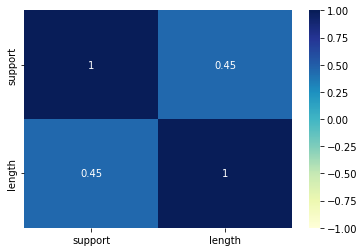

In [30]:
import seaborn as sns
sns.heatmap(data=fpgrowth_frequent_itemsets.corr(method='spearman'),
           annot=True,
           vmin=-1,
           vmax=1,
           center=0,
           cmap='YlGnBu');

from mlxtend documentation:

leverage(A−>C)=support(A−>C)−support(A)∗support(C)  --->range: [-1, 1]

conviction=[1−support(C)]/[1−confidence(A−>C)]  --->range: [0, inf]

In [31]:
%%time
from mlxtend.frequent_patterns import association_rules
rules = association_rules(fpgrowth_frequent_itemsets,metric="lift",min_threshold=0.01)

CPU times: user 9.18 ms, sys: 0 ns, total: 9.18 ms
Wall time: 17.7 ms


In [32]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ambulatory),(wellness),0.492630,0.499420,0.492050,0.998823,1.999965,0.246021,425.421201
1,(wellness),(ambulatory),0.499420,0.492630,0.492050,0.985243,1.999965,0.246021,34.381443
2,(outpatient),(wellness),0.423236,0.499420,0.422657,0.998630,1.999579,0.211284,365.494665
3,(wellness),(outpatient),0.499420,0.423236,0.422657,0.846294,1.999579,0.211284,3.752387
4,(ambulatory),(outpatient),0.492630,0.423236,0.421414,0.855438,2.021183,0.212916,3.989730
5,(outpatient),(ambulatory),0.423236,0.492630,0.421414,0.995696,2.021183,0.212916,117.871274
6,(emergency),(wellness),0.361875,0.499420,0.361378,0.998627,1.999572,0.180650,364.588854
7,(wellness),(emergency),0.499420,0.361875,0.361378,0.723595,1.999572,0.180650,2.308658
8,(ambulatory),(emergency),0.492630,0.361875,0.360301,0.731383,2.021095,0.182031,2.375599
9,(emergency),(ambulatory),0.361875,0.492630,0.360301,0.995652,2.021095,0.182031,116.695098


In [33]:
rules[rules["antecedents"].apply(lambda x: "urgentcare" in str(x))].sort_values(ascending=False,by='lift')

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
29,(urgentcare),(inpatient),0.140195,0.177045,0.060616,0.432369,2.442134,0.035795,1.449805
27,(urgentcare),(emergency),0.140195,0.361875,0.113779,0.811577,2.242701,0.063046,3.386664
25,(urgentcare),(outpatient),0.140195,0.423236,0.131666,0.939161,2.219000,0.072330,9.480205
21,(urgentcare),(ambulatory),0.140195,0.492630,0.140195,1.000000,2.029921,0.071131,inf
22,(urgentcare),(wellness),0.140195,0.499420,0.140195,1.000000,2.002321,0.070179,inf


In [34]:
#it is showing what will happend most likely if it is 'emergency'
rules[rules["antecedents"].apply(lambda x: "emergency" in str(x))].groupby(
    ['antecedents', 'consequents'])[['lift']].max().sort_values(ascending=False,by='lift').head(10)

lift
antecedents consequents           
(emergency) (inpatient)   2.311008
            (urgentcare)  2.242701
            (outpatient)  2.070242
            (ambulatory)  2.021095
            (wellness)    1.999572

In [35]:
rules[rules["antecedents"].apply(lambda x: "Teodora360 Kihn564" in str(x))].groupby(
    ['antecedents', 'consequents'])[['lift']].max().sort_values(ascending=False,by='lift').head(10)

,,lift
antecedents,consequents,
(Teodora360 Kihn564),(Cecille691 Halvorson124),53.664665
